In [1]:
import pandas as pd
import numpy as np
import tpot
import matplotlib.pyplot as plt

In [2]:
telescope_data = pd.read_csv("./magic04.data",header=None)
telescope_data.columns = ['fLength', 'fWidth','fSize','fConc','fConcl','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

In [3]:
telescope_data.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
telescope_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConcl      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
class       19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [5]:
telescope_data.describe()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


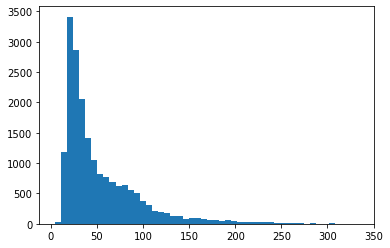

In [6]:
plt.hist(telescope_data.fLength,bins=50);

In [7]:
telescope_data['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [8]:
telescope_shuffle = telescope_data.iloc[np.random.permutation(len(telescope_data))]

tele = telescope_shuffle.reset_index(drop=True)
tele.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,60.6745,21.4003,3.1984,0.2001,0.1149,-1.6209,64.9926,-14.3242,18.0820,108.3850,g
1,109.1565,18.2065,3.3285,0.1588,0.1084,-94.8638,46.7544,13.4866,59.0910,130.6783,h
2,26.6349,25.9017,2.8122,0.4255,0.2007,14.0788,23.3311,12.7453,30.9235,185.8905,h
3,250.0880,45.9908,4.0203,0.0752,0.0495,-353.2600,-206.3780,-18.5736,82.2326,43.3838,h
4,38.5725,12.5664,2.5132,0.5061,0.3236,-26.1194,-27.7910,6.9751,12.1400,163.3130,h


In [9]:
tele['class'] = tele['class'].map({'g':0,'h':1})

In [10]:

tele.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,60.6745,21.4003,3.1984,0.2001,0.1149,-1.6209,64.9926,-14.3242,18.0820,108.3850,0
1,109.1565,18.2065,3.3285,0.1588,0.1084,-94.8638,46.7544,13.4866,59.0910,130.6783,1
2,26.6349,25.9017,2.8122,0.4255,0.2007,14.0788,23.3311,12.7453,30.9235,185.8905,1
3,250.0880,45.9908,4.0203,0.0752,0.0495,-353.2600,-206.3780,-18.5736,82.2326,43.3838,1
4,38.5725,12.5664,2.5132,0.5061,0.3236,-26.1194,-27.7910,6.9751,12.1400,163.3130,1


In [11]:
#storing the prediction classes in a variable 
tele_class = tele['class'].values

In [12]:
tele.isnull().any()

fLength     False
fWidth      False
fSize       False
fConc       False
fConcl      False
fAsym       False
fM3Long     False
fM3Trans    False
fAlpha      False
fDist       False
class       False
dtype: bool

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
training_indices, validation_indices = training_indices, testing_indices = train_test_split(tele.index,
                                                                                            stratify = tele_class,
                                                                                            train_size=0.75, test_size=0.25)

In [15]:
print(training_indices.shape)
print(testing_indices.shape)b


(14265,)
(4755,)


In [17]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor

tpot = TPOTClassifier(generations=1,verbosity=2,n_jobs=-1)

tpot.fit(tele.drop('class',axis=1).loc[training_indices].values,
         tele.loc[training_indices,'class'].values)

Generation 1 - Current best internal CV score: 0.8801965734729447

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=6, min_child_weight=6, n_estimators=100, nthread=1, subsample=0.8)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=1,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [18]:
tpot.score(tele.drop('class',axis=1).loc[validation_indices].values,
           tele.loc[validation_indices, 'class'].values)Isn't that awesome? Without you tweaking a lot of parameters and options to get the best model, TPOT not only gave you the information about the best model but also a working code for it!



0.8813880126182966

In [19]:
#Finally, you can tell TPOT to export the corresponding Python code for the optimized pipeline to a text file with the export function:
tpot.export('tpot_MAGIC_Gamma_Telescope_pipeline.py')